In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
deaths = pd.read_csv("avg_deaths.csv") # From 1 Jan 2020 Till 15th Dec 2020
deaths.rename(columns = {"New_deaths": "Per_Day_Deaths"}, inplace=True)

In [3]:
import calendar

In [4]:
deaths["No_of_Days"] = 0

In [5]:
deaths["Year"] = 2020

In [6]:
deaths

,Month,Per_Day_Deaths,No_of_Days,Year
0,1,0,0,2020
1,2,0,0,2020
2,3,77,0,2020
3,4,1844,0,2020
4,5,1448,0,2020
5,6,785,0,2020
6,7,769,0,2020
7,8,1020,0,2020
8,9,739,0,2020
9,10,751,0,2020


In [7]:
calendar.monthrange(2020, 1)

(2, 31)

In [8]:
def days(year, day):
    _, num_days = calendar.monthrange(year, day)
    return num_days

days(2020, 2)

29

In [9]:
deaths

,Month,Per_Day_Deaths,No_of_Days,Year
0,1,0,0,2020
1,2,0,0,2020
2,3,77,0,2020
3,4,1844,0,2020
4,5,1448,0,2020
5,6,785,0,2020
6,7,769,0,2020
7,8,1020,0,2020
8,9,739,0,2020
9,10,751,0,2020


In [10]:
days = (deaths[["Year", "Month"]]).apply(lambda row: days(row["Year"], row["Month"]), axis=1)

In [11]:
days

0     31
1     29
2     31
3     30
4     31
5     30
6     31
7     31
8     30
9     31
10    30
11    31
dtype: int32

In [12]:
deaths["No_of_Days"] = days

In [13]:
deaths.loc[11, "No_of_Days"] = deaths.loc[11, "No_of_Days"] // 2 

In [14]:
deaths

,Month,Per_Day_Deaths,No_of_Days,Year
0,1,0,31,2020
1,2,0,29,2020
2,3,77,31,2020
3,4,1844,30,2020
4,5,1448,31,2020
5,6,785,30,2020
6,7,769,31,2020
7,8,1020,31,2020
8,9,739,30,2020
9,10,751,31,2020


In [15]:
deaths["Monthly_Deaths"] = deaths["Per_Day_Deaths"].mul(deaths["No_of_Days"])

In [16]:
deaths = deaths[["Year", "Month", "No_of_Days", "Monthly_Deaths", "Per_Day_Deaths"]]

In [22]:
deaths["Cum_Deaths"] = deaths["Monthly_Deaths"].cumsum()

C:\Users\atif\AppData\Local\Temp\ipykernel_892\2155794696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deaths["Cum_Deaths"] = deaths["Monthly_Deaths"].cumsum().copy()


In [18]:
deaths

,Year,Month,No_of_Days,Monthly_Deaths,Per_Day_Deaths,Cum_Deaths
0,2020,1,31,0,0,0
1,2020,2,29,0,0,0
2,2020,3,31,2387,77,2387
3,2020,4,30,55320,1844,57707
4,2020,5,31,44888,1448,102595
5,2020,6,30,23550,785,126145
6,2020,7,31,23839,769,149984
7,2020,8,31,31620,1020,181604
8,2020,9,30,22170,739,203774
9,2020,10,31,23281,751,227055


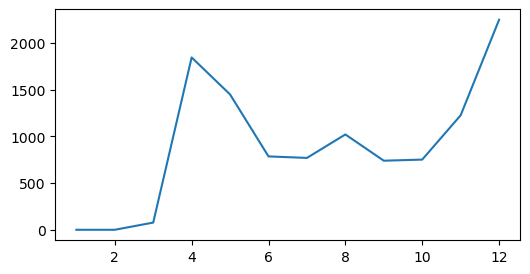

In [19]:
fig, ax = plt.subplots(figsize=(6,3))

ax.plot(deaths["Month"], deaths["Per_Day_Deaths"])

plt.show()

In [20]:
cum_cases = [deaths["Cum_Deaths"][2], deaths["Cum_Deaths"][5],
             deaths["Cum_Deaths"][8], deaths["Cum_Deaths"][11]]
    
proportion = [round(i/cum_cases[-1],2) for i in cum_cases]

hline_max = [round(0.5+i*(0.8-0.5),3) for i in proportion]
hline_max
    

[0.503, 0.626, 0.704, 0.8]

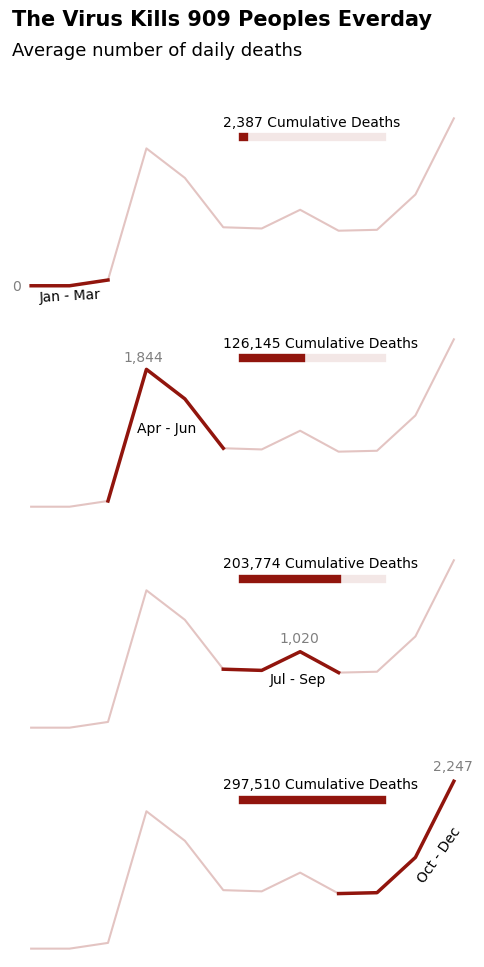

In [24]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize = (6,11))

axes = [ax1, ax2, ax3, ax4]

avg_monthly_deaths = round(deaths["Per_Day_Deaths"].mean())

ax1.text(x=0.5, y=3500, s="The Virus Kills {:,} Peoples Everday".format(avg_monthly_deaths),
         weight="bold", size= 15)
ax1.text(x=0.5, y=3100, s="Average number of daily deaths", size= 13)

for ax, hline, cum_death in zip(axes, hline_max, cum_cases):
    ax.plot(deaths["Month"], deaths["Per_Day_Deaths"], color="#91150d", alpha=0.25)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(left=False, bottom=False)
    ax.axhline(y=2000, xmin=0.5, xmax= 0.8, color="#91150d", linewidth=6, alpha=0.1)
    ax.text(x=6, y=2150, s="{:,} Cumulative Deaths".format(cum_death))
    ax.axhline(y=2000, xmin=0.5, xmax= hline, color="#91150d", linewidth=6)    

    for spine in ax.spines:
        ax.spines[spine].set_visible(False)
        
ax1.plot(deaths["Month"][:3], deaths["Per_Day_Deaths"][:3], color="#91150d", linewidth=2.5)
ax1.text(x=0.5, y=-60, s="0", alpha=0.5)
ax1.text(x=1.2, y=-200, s="Jan - Mar", rotation=3)

ax2.plot(deaths["Month"][2:6], deaths["Per_Day_Deaths"][2:6], color="#91150d", linewidth=2.5)
ax2.text(x=3.4, y=1950, s="1,844", alpha=0.5)
ax2.text(x=3.75, y=1000, s="Apr - Jun")

ax3.plot(deaths["Month"][5:9], deaths["Per_Day_Deaths"][5:9], color="#91150d", linewidth=2.5)
ax3.text(x=7.45, y=1150, s="1,020", alpha=0.5)
ax3.text(x=7.2, y=600, s="Jul - Sep")

ax4.plot(deaths["Month"][8:], deaths["Per_Day_Deaths"][8:], color="#91150d", linewidth=2.5)
ax4.text(x=11.45, y=2400, s="2,247", alpha=0.5)
ax4.text(x=11, y=900, s="Oct - Dec", rotation=55)

plt.show()